<h1>Histogram Equalization and Gamma Correction</h1>
<h2>Question : </h2>
<p>Write a program to perform histogram equalization on the image “home.jpg” to enhance its contrast. Also implement gamma correction on the image “sunset.jpg” using different gamma values. Check which one gives the best output. Use the histogram equalization method on the image “sunset.jpg” and compare the equalized image with the best gamma corrected image. </p>

<h3>Pre-requesites</h3>
<p>Install opencv-python, matplotlib and numpy libraries</h2></p>


<h3>Import necessary libraries</h3>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3>Histogram Equalization</h3>
<ol>
    <li>Load the source image</li>
    <li>Convert it to grayscale</li>
    <li>Apply histogram equalization with the function cv::equalizeHist</li>
</ol>

In [2]:
# Function for histogram equalization
def histogram_equalization(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is None:
        print(f"Error: Image '{image_path}' not found!")
        return None,None
    equalized_img = cv2.equalizeHist(img)  # Apply histogram equalization
    return img, equalized_img

<h3>Gamma Correction</h3>
<ol>
    <li>Load the image</li>
    <li>Convert to RGB (default is BGR)</li>
    <li>Convert each pixel value to the range (0,1) in double format (We apply gamma correction to pixel values falling in the range [0,1])</li>
    <li>Apply power function to the pixel values with desired gamma</li>
    <li>Multiply the pixel value by 255(includes rounding off) and do clipping(for values out of range) to convert it to original range [0,255]</li>
</ol>

<h4>Note : </h4>
<ol>
    <li>y > 1 makes the image darker</li>
    <li>y < 1 makes the image brighter</li>
</ol>

In [6]:
# Function for gamma correction
def gamma_correction(image_path, gamma_values):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Image '{image_path}' not found!")
        return None, []

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR to GRAY for applying gamma correction

    corrected_images = []
    for gamma in gamma_values:
        gamma_corrected = np.power(img / 255.0, gamma) * 255  # Apply gamma correction formula
        gamma_corrected = np.clip(gamma_corrected, 0, 255).astype(np.uint8)  # Ensure valid values
        corrected_images.append((gamma, gamma_corrected))

    return img, corrected_images


<h3>Best Gamma Corrected Image</h3>
<p>The best gamma image is determined by looking at the visual appearance of the image (it depends on the viewer mindset)</p>

In [7]:
# Perform histogram equalization on "home.jpg"
home_img, home_eq = histogram_equalization("home.jpg")
if home_img is None or home_eq is None:
    exit()  # Exit if the image is not found

# Perform gamma correction on "sunset.jpg"
gamma_values = [0.2, 0.4, 0.6, 1.0, 1.5, 2.2]
sunset_img, gamma_corrected_images = gamma_correction("sunset.jpg", gamma_values)
if sunset_img is None or not gamma_corrected_images:
    exit()  # Exit if the image is not found

# Find the best gamma visually (assuming gamma=0.6 is best)
best_gamma, best_gamma_image = gamma_corrected_images[2]  # Assuming gamma=0.6

# Perform histogram equalization on "sunset.jpg"
sunset_gray, sunset_eq = histogram_equalization("sunset.jpg")
if sunset_gray is None or sunset_eq is None:
    exit()

# Determine number of gamma correction images (We took 6 gamma values)
num_gamma = len(gamma_corrected_images)


<h3>Show the resultant images</h3>
<ol>
    <li>Decide the plotting dimensions</li>
    <li>Plot the images using matplotlib</li>
</ol>

<h4>Note:</h4>
<p>The images if resized while plotting , it follows nearest neighbour interpolation</p>

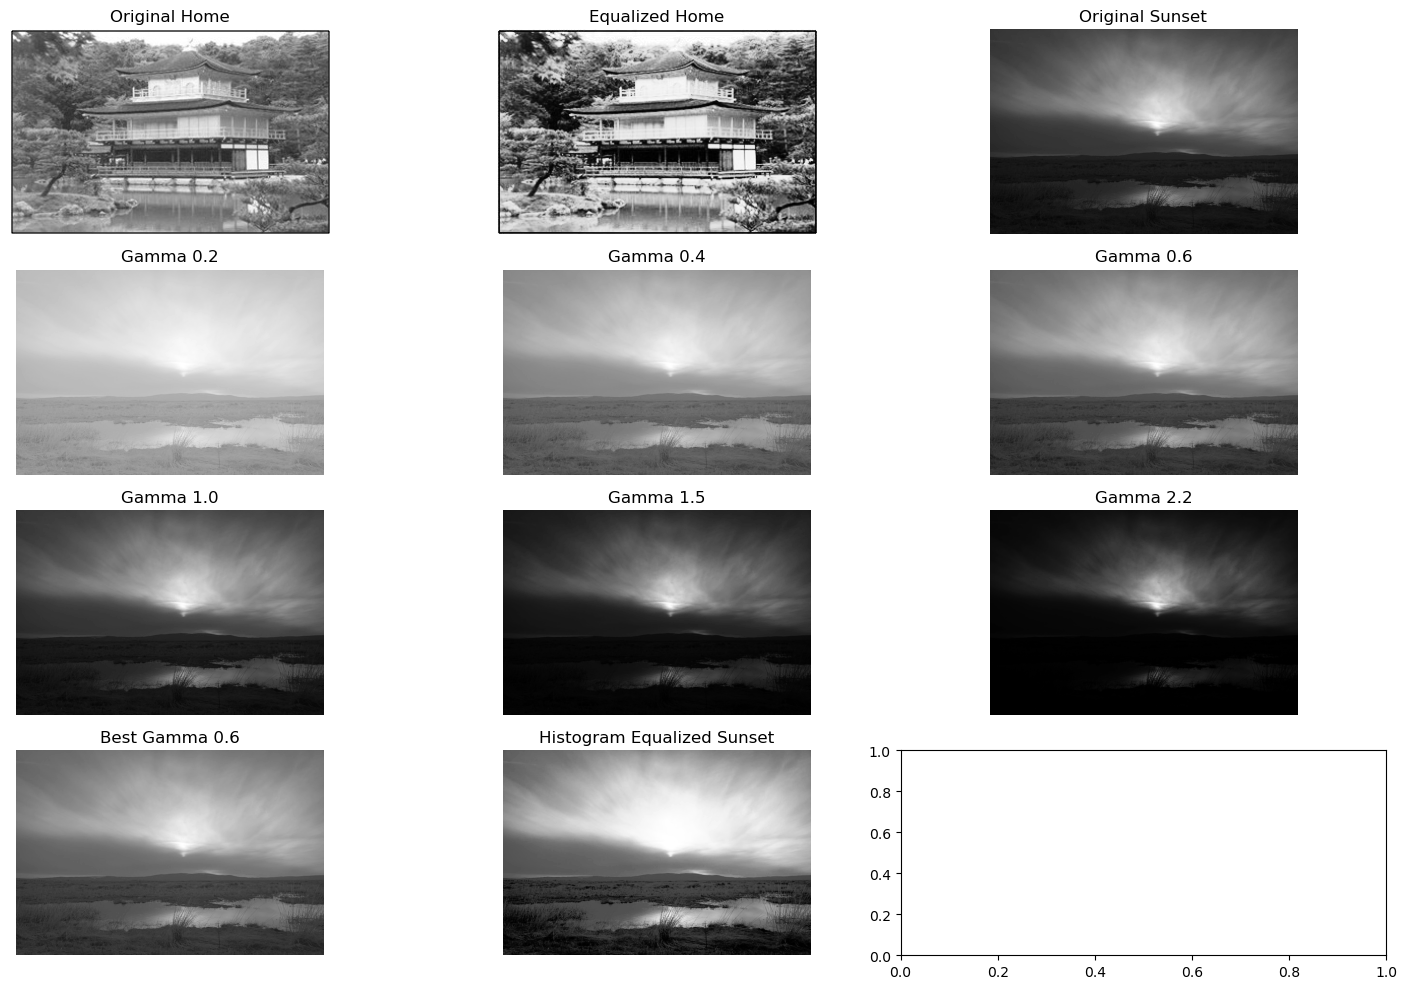

In [9]:
# Plot results with correct dimensions
fig, axes = plt.subplots(4, 3, figsize=(15, 10))  # Ensure at least 2 columns

# Original home image vs histogram equalized
axes[0, 0].imshow(home_img, cmap="gray")
axes[0, 0].set_title("Original Home")
axes[0, 0].axis("off")

axes[0, 1].imshow(home_eq, cmap="gray")
axes[0, 1].set_title("Equalized Home")
axes[0, 1].axis("off")

# Original sunset vs gamma correction
axes[0, 2].imshow(sunset_img, cmap="gray")
axes[0, 2].set_title("Original Sunset")
axes[0, 2].axis("off")

for i in range(num_gamma//3 + 1):
    gamma, img = gamma_corrected_images[i]
    axes[1, i].imshow(img, cmap="gray")
    axes[1, i].set_title(f"Gamma {gamma}")
    axes[1, i].axis("off")
for i in range(num_gamma//3 + 1,num_gamma):
    gamma, img = gamma_corrected_images[i]
    axes[2, i%3].imshow(img, cmap="gray")
    axes[2, i%3].set_title(f"Gamma {gamma}")
    axes[2, i%3].axis("off")

# Histogram equalized sunset vs best gamma correction
axes[3, 0].imshow(best_gamma_image, cmap="gray")
axes[3, 0].set_title(f"Best Gamma {best_gamma}")
axes[3, 0].axis("off")

axes[3, 1].imshow(sunset_eq, cmap="gray")
axes[3, 1].set_title("Histogram Equalized Sunset")
axes[3, 1].axis("off")

plt.tight_layout()
plt.show()


<h3>Conclusion:</h3>
<ul>
    <li>Comparing the grayscale images of sunset, we conclude that the gamma correction of 0.6 is the best</li>
    <li>When compared the with the histogram equalized verison, it is better than the original one since land seems visible but gamma corrected image is the best since the image is of sunset (Histogram equalization makes the region around sun brighter, which is not preferred)</li>
    <li>The contrast improves on performing histogram equalization on the "home" image.</li>
</ul>

In [1]:
import cv2
import numpy as np

# Load the color image
img = cv2.imread('home.jpg')

# Convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Histogram equalization on the V channel
hsv[:, :, 2] = cv2.equalizeHist(hsv[:, :, 2])

# Convert back to RGB color space
hist_eq_color = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Save or display the result
cv2.imwrite('hist_eq_color.jpg', hist_eq_color)
cv2.imshow('Histogram Equalized Color Image', hist_eq_color)
cv2.waitKey(0)
cv2.destroyAllWindows()
